In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dataid=1

In [3]:
# get comparison to true posterior
# prior = uniform([0., 0.2], [2., 0.8])
# load marginals from Tom's code
size = 250
marginal = np.load('./marginal_field_%d_20x20_field.npy'%(dataid))
arr = marginal[~np.isnan(marginal)]
inds = np.argsort(arr)[::-1]
cdf = np.cumsum(arr[inds] / arr.sum())
levels = [arr[inds[np.argmin(np.abs(i - cdf))]] for i in [0.99, 0.95, 0.68, 0.]]


In [4]:
# pull in abc marginals
abc_marginal = np.load('abc_marginal_field_%d.npy'%(dataid))
distances = np.load('abc_distances.npy')

abc_ranges = np.load('./abc_ranges.npy')
abc_2d_marginal = np.load('./abc_2d_marginal_field_1.npy')
abc_levels = np.load('./abc_2d_marginal_field_levels_1.npy')


# pull in maf marginals

maf_ranges = abc_ranges#= np.load('./maf_1_ranges.npy')
maf_2d_marginal = np.load('./maf_1_2d_marginal_field_1.npy')
maf_levels = np.load('./maf_1_2d_marginal_field_levels_1.npy')

In [5]:
abc_levels

array([ 1.5741762,  4.5273166, 19.432096 ], dtype=float32)

In [13]:
N=20

In [14]:
target = dict(
    f_NL=None,
    α=np.array(1.0),
    β=np.array(0.5))

dat = np.load("./correlations_vs_field/data/Sims20_05_10_80_80_500_80_1_123456.npy")
target['f_NL'] = dat[dataid]['field'].flatten()

/Users/lucas/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'label'
/Users/lucas/anaconda3/envs/21cm/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'label'


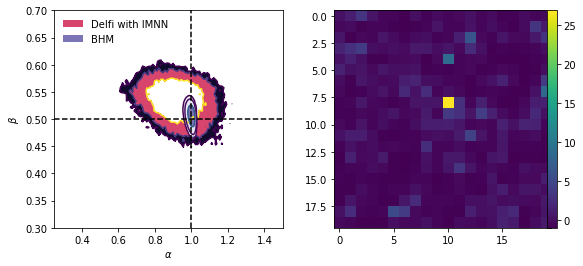

In [28]:
row=1
column=0

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

# ABC estimate
# plt.contour(abc_ranges[column], abc_ranges[row], abc_2d_marginal.T, levels=abc_levels,
#                 cmap='viridis')

# cs = plt.contourf(abc_ranges[column], abc_ranges[row], abc_2d_marginal.T, levels=abc_levels,
#                 cmap='viridis', label='ABC with IMNN')

# proxy2 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
#     for pc in cs.collections]

#plt.subplot(121)

# # delfi estimate
ax = axs[0]

ax.contour(maf_ranges[column], maf_ranges[row], maf_2d_marginal.T, levels=maf_levels,
                cmap='viridis')

cs = ax.contourf(maf_ranges[column], maf_ranges[row], maf_2d_marginal.T, levels=maf_levels,
                cmap='magma', label='Delfi with IMNN')

proxy2 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]


# BHM solution
cs = ax.contourf(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, cmap="Purples")

proxy1 = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

ax.contour(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, label='BHM')

# legend


proxies = [proxy2[1], proxy1[2]]


ax.legend(proxies, ["Delfi with IMNN", "BHM"], framealpha=0.)


# plt.scatter(abc_marginal.T[0], abc_marginal.T[1], s=30, alpha=0.6,
#                 c=np.log(distances), cmap='viridis', edgecolors=None, linewidths=0, marker='.')


ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")
ax.set_ylim(0.3, 0.7)
ax.set_xlim(0.25, 1.5)
ax.axvline(1.0, linestyle="dashed", color="black")
ax.axhline(0.5, linestyle="dashed", color="black");


ax = axs[1]
plt.subplot(122)
im = plt.imshow(target["f_NL"].reshape((N, N)))
divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.5)
plt.colorbar(im, cax=cax, orientation='vertical')



# plt.axvline(0.95, linestyle="dashed", color="gray")
# plt.axhline(0.55, linestyle="dashed", color="gray");
#plt.legend()
plt.savefig("/Users/lucas/repositories/FieldIMNNs/plots/IMNNxDelfi_vs_BHM_field_%d.png"%(dataid), bbox_inches="tight", transparent=True)

In [17]:
!git clone https://github.com/florent-leclercq/correlations_vs_field.git

Cloning into 'correlations_vs_field'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 124 (delta 26), reused 70 (delta 20), pack-reused 41
Receiving objects: 100% (124/124), 49.68 MiB | 4.23 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [28]:
import seaborn as sns

# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', color="skyblue")

plt.show()

In [25]:
abc_2d_marginal.shape

(100, 100)

In [13]:
abc_marginal.shape

(1026, 2)